In [100]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

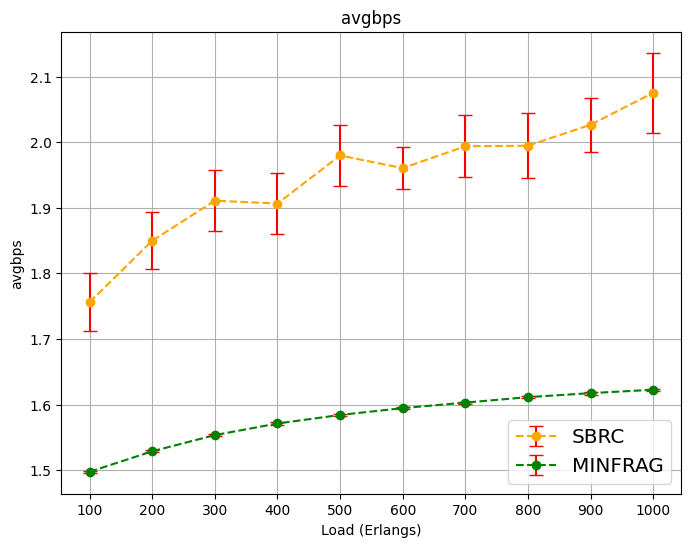

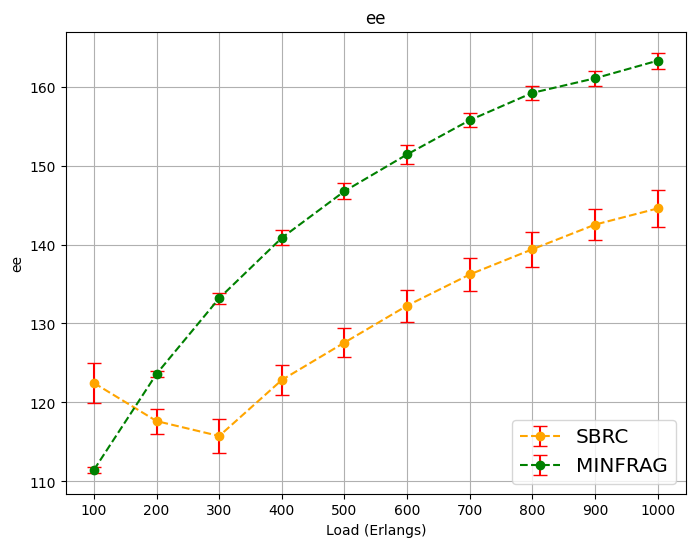

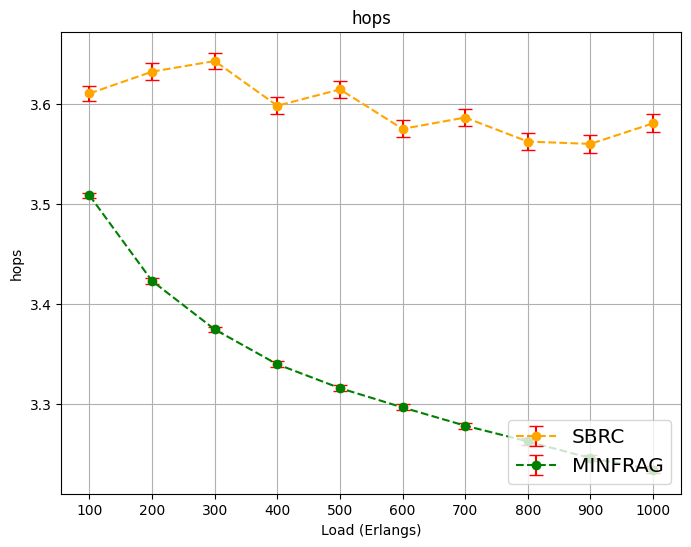

File not found.
File not found.


/tmp/ipykernel_77268/1295830887.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right', fontsize='x-large')


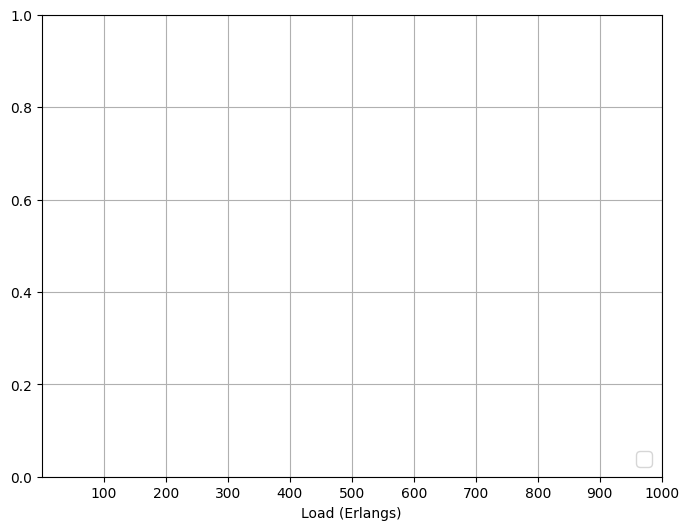

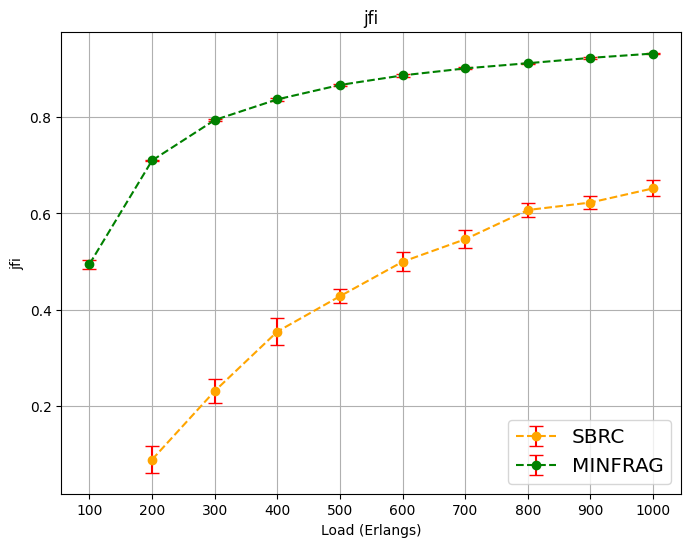

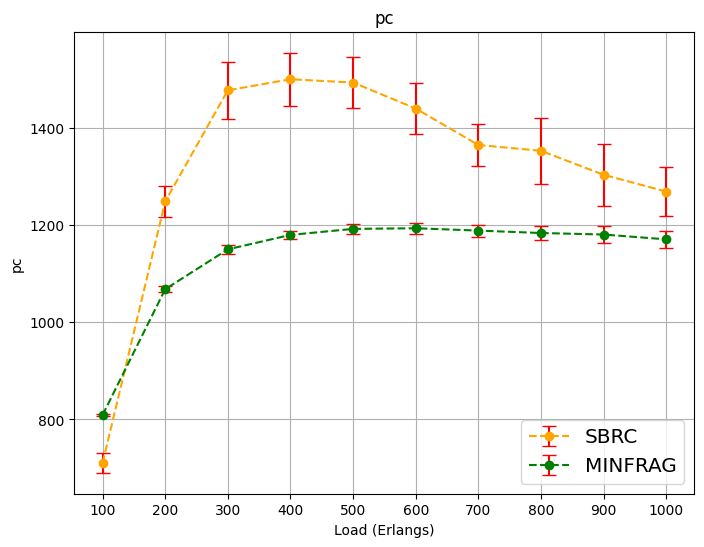

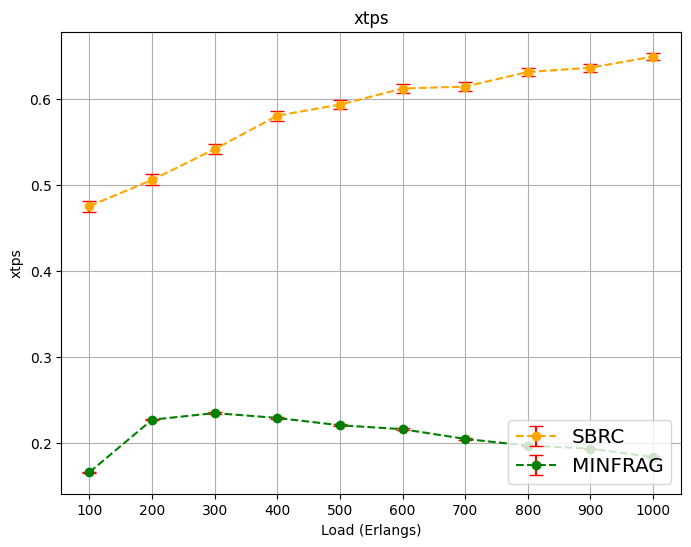

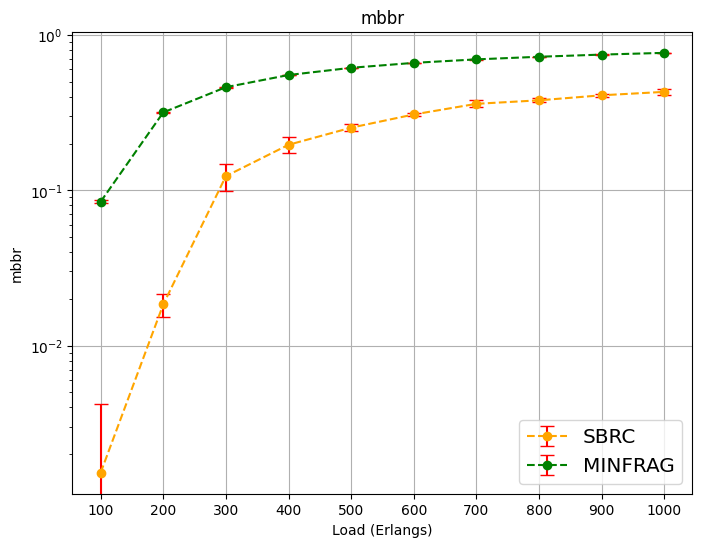

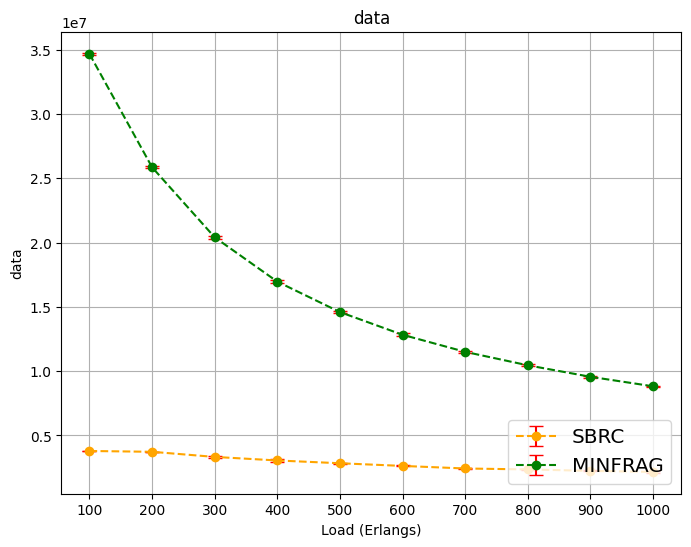

In [102]:
algorithms = ['SBRC', 'MINFRAG']
metrics = ['avgbps', 'ee', 'hops', 'hopsback', 'jfi', 'pc', 'xtps', 'mbbr', 'data']
topologies = ['nsf']
data_folder = './data'
log = ['mbbr']
colors = ['orange', 'green', 'red', 'blue']

for metric in metrics:
    for topology in topologies:
        # x, y, confidence_interval = [], [] ,[]
        plt.figure(figsize=(8, 6))
        for algorithm in range(len(algorithms)):
            try:
                filename = f'{algorithms[algorithm]}-{topology}-{metric}.dat'
                full_path = os.path.join(data_folder, filename)
                data = pd.read_csv(full_path, header=None, delimiter='\t')
                
                x = data[0]
                y = data[1]
                confidence_interval = data[2]

                plt.errorbar(x, y, yerr=confidence_interval, fmt='o--', color=colors[algorithm], ecolor='red', capsize=5, label=algorithms[algorithm])
                plt.title(metric)
                plt.ylabel(metric)
                if metric in log:
                    plt.yscale('log')
            except:
                print('File not found.')

        # Adding titles and labels
        plt.legend(loc='lower right', fontsize='x-large')
        # plt.ylim(10**-3, 1)
        plt.xlabel('Load (Erlangs)')

        # Customize X-axis to show the point clearly
        plt.xticks(x)

        # Show plot
        plt.grid(True)
        plt.show()